# OpenCV Functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

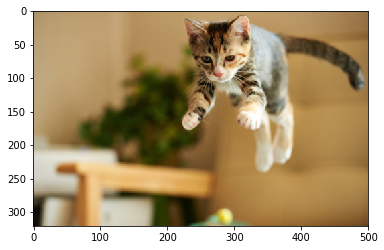

In [4]:
%matplotlib inline
image = cv2.imread("index.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)


**Gray Scale Image**

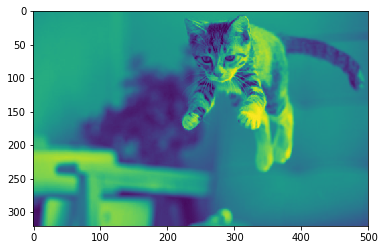

In [5]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

**HSV format image**

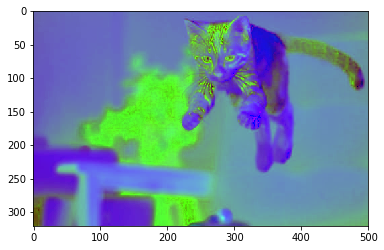

In [6]:
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

**Image Rotation**

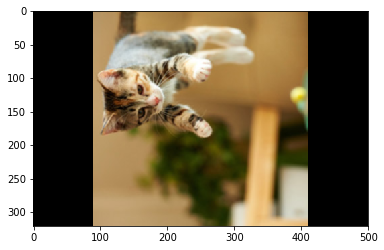

In [7]:
rows,cols = image.shape[:2]
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)


**Image Translation**

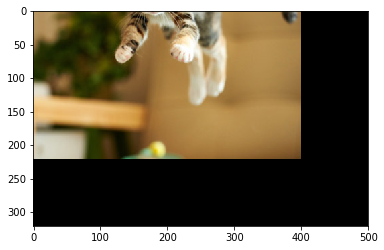

In [8]:
M = np.float32([[1,0,-100],[0,1,-100]]) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

**Image Thresholding**

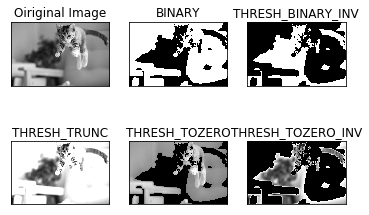

In [9]:
gray_image = cv2.imread('index.png',0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Adaptive Thresholding**

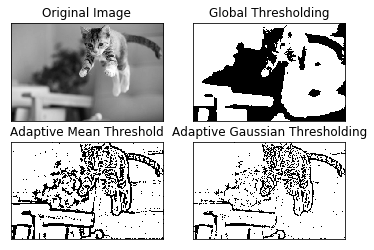

In [10]:
gray_image = cv2.imread('index.png',0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Edge Detection**

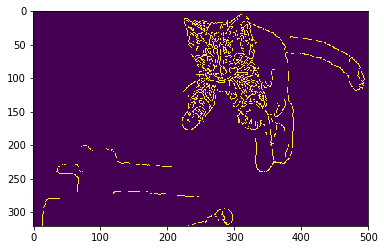

In [11]:
edges = cv2.Canny(image,100,200) 
plt.imshow(edges)

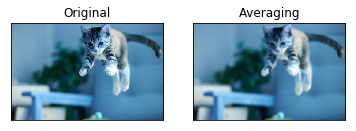

In [12]:
img = cv2.imread('index.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

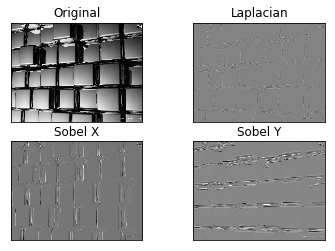

In [13]:
img = cv2.imread('blocks.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

**Opening**

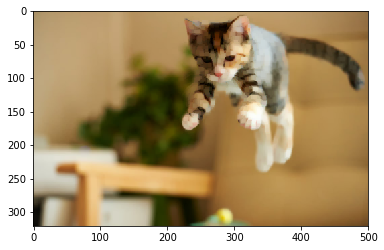

In [16]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

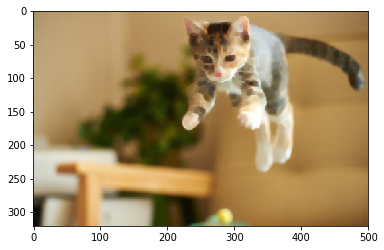

In [15]:
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

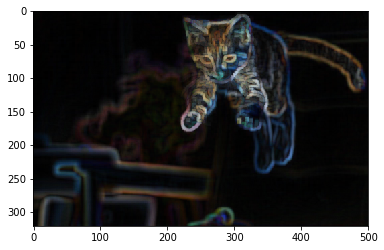

In [15]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

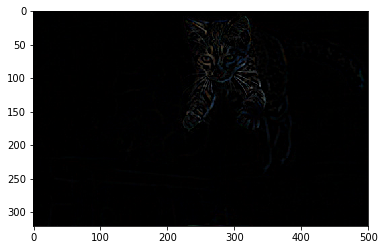

In [16]:
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat)